In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
from tensorflow.keras.applications import MobileNetV2

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow import keras

In [4]:
dataset_dir = "C:/Users/Piriyavinojan/Desktop/model/dataset2"

In [5]:
from PIL import Image
import os

folder = 'C:/Users/Piriyavinojan/Desktop/model/dataset2'

for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        img = Image.open(file_path)
        img.verify()  # Verifies if the image file is intact
    except (IOError, SyntaxError) as e:
        print(f"Bad file: {file_path} | Error: {e}")


Bad file: C:/Users/Piriyavinojan/Desktop/model/dataset2\Aloevera | Error: [Errno 13] Permission denied: 'C:\\Users\\Piriyavinojan\\Desktop\\model\\dataset2\\Aloevera'
Bad file: C:/Users/Piriyavinojan/Desktop/model/dataset2\amanakku | Error: [Errno 13] Permission denied: 'C:\\Users\\Piriyavinojan\\Desktop\\model\\dataset2\\amanakku'
Bad file: C:/Users/Piriyavinojan/Desktop/model/dataset2\ashoka | Error: [Errno 13] Permission denied: 'C:\\Users\\Piriyavinojan\\Desktop\\model\\dataset2\\ashoka'
Bad file: C:/Users/Piriyavinojan/Desktop/model/dataset2\Gauva | Error: [Errno 13] Permission denied: 'C:\\Users\\Piriyavinojan\\Desktop\\model\\dataset2\\Gauva'
Bad file: C:/Users/Piriyavinojan/Desktop/model/dataset2\Mint | Error: [Errno 13] Permission denied: 'C:\\Users\\Piriyavinojan\\Desktop\\model\\dataset2\\Mint'
Bad file: C:/Users/Piriyavinojan/Desktop/model/dataset2\neem | Error: [Errno 13] Permission denied: 'C:\\Users\\Piriyavinojan\\Desktop\\model\\dataset2\\neem'
Bad file: C:/Users/Piriy

In [6]:
img_size = 224  # MobileNetV2 accepts 224x224 input
batch_size = 32

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 80% training, 20% validation split
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224,224 ),
   batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1884 images belonging to 10 classes.
Found 465 images belonging to 10 classes.


In [10]:
import tensorflow as tf

def load_image(img_path):
    try:
        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels=3)  # or decode_png for PNG files
        img = tf.image.resize(img, [224, 224])
    except Exception as e:
        print(f"Error loading image: {img_path} - {str(e)}")
        return None  # or handle the error
    return img


In [11]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [12]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [13]:
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Pooling to reduce dimensions
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [14]:
model = Model(inputs=base_model.input, outputs=predictions)

In [15]:
from tensorflow.keras.optimizers import Adam


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [18]:
epochs = 30
  # Adjust based on hardware and dataset size
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/30


c:\Users\Piriyavinojan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.3086 - loss: 2.0907 - val_accuracy: 0.5558 - val_loss: 1.2787
Epoch 2/30
 1/58 ━━━━━━━━━━━━━━━━━━━━ 40s 719ms/step - accuracy: 0.6250 - loss: 1.0779

c:\Users\Piriyavinojan\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6250 - loss: 1.0779 - val_accuracy: 0.5294 - val_loss: 1.4263
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.6863 - loss: 0.9622 - val_accuracy: 0.6540 - val_loss: 0.9779
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6875 - loss: 0.9497 - val_accuracy: 0.6471 - val_loss: 1.1381
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7560 - loss: 0.7233 - val_accuracy: 0.6920 - val_loss: 0.8785
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8750 - loss: 0.6072 - val_accuracy: 0.7647 - val_loss: 0.5187
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7703 - loss: 0.6455 - val_accuracy: 0.7299 - val_loss: 0.7893
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6875 - loss: 0.7718 - val_accuracy: 0.6471 - val_loss: 1.1358
Epoch 9/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8195 - loss: 0.5609 - val_accuracy: 0.7634 - val_loss: 0.7528
Ep

In [20]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

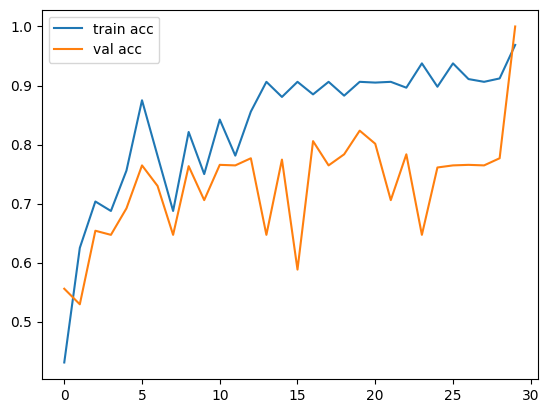

In [21]:
plt.plot(history.history['accuracy'], label= 'train acc')
plt.plot(history.history['val_accuracy'], label= 'val acc')
plt.legend()
# plt.saveig('vcc-acc-rps-1.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

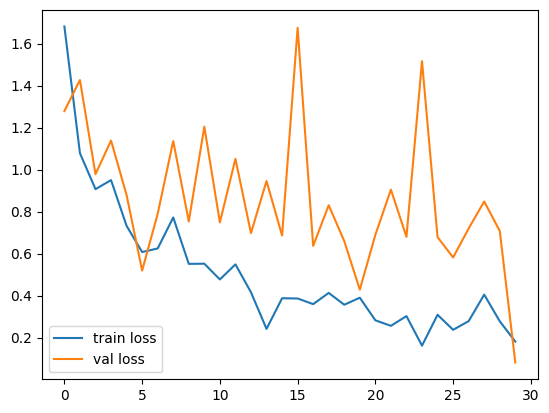

In [24]:
#loss
plt.plot(history.history['loss'], label= 'train loss')
plt.plot(history.history['val_loss'], label= 'val loss')
plt.legend()
# plt.saveig('vcc-loss-rps-1.png')
plt.show

In [25]:
pip install Flask


In [26]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [27]:
model = load_model('my_model.keras')

In [28]:
herb_classes = ['Aloevera', 'amanakku', 'ashoka', 'Gauva','Mint','neem','Nithyapushpa','seemaiNaayuruvi','tulsi','Wood_sorel']

In [29]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array

In [30]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [31]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [32]:
import cv2
out=['கற்றாழை',
 'கொய்யா',
 'புதினா',
 'பட்டிப்பூ',
 'புளியாரை',
 'ஆமணக்கு',
 'அசோக இலை',
 'வேம்பு',
 'சீமை நாயுருவி',
 'துளசி'
 ]

In [35]:
plant_uses_tamil = ["இந்தச் சாற்றை வெதுப்பி மாந்த நோய்களுக்கும், ஊழியால் காணும்நீர்வேட்கைக்கும் கொடுக்கலாம்.\nதாபிதங்களுக்கும், வீக்கங்களுக்கும் பூச, அவைதணியும். \nசிறிது அபினி சேர்த்துத் தலைக்குப் பற்றிடத் தலை நோய் நீங்கும்.\nநல்லெண்ணெய் ஒரெடையாகக் கலந்து காய்ச்சித் தலையில் தடவிவர, தூக்கம்உண்டாகும்.\nவெண்ணெய், கற்கண்டு, வால்மிளகுத்தூள் இவைகளைச்சாற்றுடன் சேர்த்துண்ண நீர்ச்சுருக்கு, உடலரிப்பு, உள்வெட்கை நீங்கும். ",
    "இலையைக் குடிநீர் செய்து வாந்திபேதிக்குக் கொடுக்கலாம்.\nகருணைக்கிழங்கின் காரல் நீங்க, இதன் இலையைச் சேர்த்துவேகவைக்கலாம். \nஇலையை வாயிலிட்டு மென்றால் பல் வலி போகும்.அதிசாரத்துக்கு இக்குடிநீரைக் கொண்டு பீச்சு செய்யலாம். \nவெள்ளைக் கொய்யாவின் வேர்ப்பட்டை 17 கிராம், நீர் 272 கிராம் இதைப்பாதியாகச் சுண்டவைத்து வடிகட்டி, தேக்கரண்டி வீதம் குழந்தைகளுக்குக்காணும் பேதியைக் கட்ட உள்ளுக்குக் கொடுக்கலாம்.",
    "புதினா இலைகளில் மெந்தோல் உள்ளது. இது நெஞ்சு எரிச்சலைப் போக்க உதவுகிறது. மேலும் சளி பிடித்திருக்கும் போது புதினா இலைகளை சாப்பிட்டால் மூக்கு அடைப்பு, தொண்டை கரகரப்பு ஆகியவற்றில் இருந்து விடுபடலாம்\nபுதினா இலைகள் மூளைக்கான ஸ்பெஷல் டானிக் ஆகும். புதினா இலைகளை சாப்பிடுவது அறிவாற்றல், நினைவாற்றல் மற்றும் மன விழிப்புணர்வு ஆகியவற்றை மேம்படுத்தும்.\nபுதினா இலைகளில் சாலிசிலிக் அமிலம் மற்றும் வைட்டமின் ஏ நிறைந்துள்ளது. இது முகப்பருவை குணப்படுத்தவும், பிசுபிசுப்பாக இருக்கும் எண்ணெய் பசை சமருத்தை கட்டுப்படுத்தவும் உதவுகிறது.\nபுதினா இலைகள் கரோட்டின் மற்றும் ஆன்டிஆக்ஸிடன்ட்களின் சிறந்த ஆதாரமாக உள்ளது. இவை முடி வளர்ச்சியை ஊக்குவித்து முடி உதிர்வதை தடுக்கின்றன.\nபுதினா டீ குடிப்பது உங்கள் உடல் எடையை படிப்படியாக குறைக்க உதவுகிறது மற்றும் வளர்சிதை மாற்றத்தை துரிதப்படுத்த உதவும்",
    "கொலஸ்ட்ரால் அளவைக் கட்டுப்படுத்துவதன் மூலம், இதய ஆரோக்கியத்தை மேம்படுத்துவதில் பட்டிப்பூ பங்கு வகிக்கிறது. \nஎல்டிஎல் (கெட்ட கொழுப்பை) குறைப்பதில் பட்டிப்பூ நன்மை பயக்கும்.\nபட்டிப்பூவில் காணப்படும் சில தனிமங்கள் இரத்தத்தில் உள்ள மொத்த கொழுப்பின் அளவைக் குறைக்க உதவும்.",
    "வாத நோய்,மூல நோய்,இரத்தக்கொதிப்பு,உஷ்ணம் ,வெள்ளைப்படுதலை தீர்க்கும்.\nஞாபகசக்திக்கு நல்லது",
    "இதனால், குளிர்சுரம், பாண்டு, கோழை, கழிச்சல், குன்மம், வாயு,சுவையின்மை,  மூலம், சன்னியாசம், அபஸ்மாரம், பிரமேகம், இருமல்பக்கவாதம், குய்யரோகம், சோணிதவாதம், களநோய், செவிவலி, இரத்தகுன்மம்,திமிர்வாதம், கழலை, வளி, சளி இவைகளையும் அகற்றும்.\nமிளகுத்தூள், வெங்காயம், உப்பு இவைகளைச் சேர்த்தரைத்துத் தலையில்காணும் புழுவெட்டுக்குப் பூச, மயிர் முளைக்கும்.\n மிளகு, பெருங்காயம், அபினி வகைக்கு 2 கிராம் எடுத்து, செவ்வையாகஅரைத்து 12, மாத்திரைகள் செய்து, அதில் ஒரு மணிக் கொரு முறை ஒருமாத்திரை கொடுத்துவர, வாந்திபேதி நீங்கும்",
    "சூலக அழற்சி, சூலகத்திலிருந்துண்டாகும் குருதிப்பெருக்கு,குருதியழல் நோய், குருதிபேதி, தீப்பிணிகள், நீரிழிவு ஆகியஇவைகள் நீங்கும்.\nபூவை நுண்ணியதாய்ப் பொடித்து, கால்பலமெடுத்துஆழாக்கு நீருடன் கலந்து கொடுக்க, குருதிக் கழிச்சலும் குருதியும் சீழுங்கலந்தகழிச்சலும் நிற்கும்.\nபட்டையையிடித்துச் சாறுபிழிந்து கால் முதல் ஒருஉச்சிக்கரண்டியளவு கொடுத்துவர, பெரும்பாடு தணியும்.\nபட்டை 105 கிராம் எடுத்துச் சிதைத்து, 336 மி.லி. பசுவின் பாலும் 1344 மி.லி. நீரும் கலந்து, ஐந்தில் ஒரு கூறாகச் சுருக்கி நாள் ஒன்றுக்குஇரண்டு மூன்று முறை கொடுத்துவர, பெரும்பாடுமுதலிய குருதிப் பெருக்குநிற்கும்.\n வீட்டுக்கு விலக்கான மூன்றாம் நாளுக்குமேல்தொடங்கிய குருதி நிற்கும்.\nகருப்பைக் குற்றம் நீங்கிப் பலப்படும்.",
    "வயிற்றுப்புழு, பெரு நோய், மாந்தம், நச்சுச்சுரம், அம்மைப் புண்,சொறி, சிரங்கு ஆகிய இவைகளை வேப்பிலை போக்கும்.\nவேப்பிலையை நீர் விட்டரைத்துக் களிபோற் கிண்டி மேலுக்குப் போடவீக்கம், நாட்பட்ட புண், தோலைப்பற்றிய புண் நோய்கள் தீரும்.\nவேப்பிலையைத் தனித்தேனும், சிறிது மஞ்சள் சேர்த்தேனும் வெந்நீர்விட்டேனும் விடாமலேனும் அரைத்துச் சீலையில் தடவி மேலுக்குப்போட,கரப்பான், சொறி, சிரங்கு, அம்மைப் புண் இவைகள் நீங்கும்.\nஎரிச்சலிருந்தால்அரிசிமா கூட்டிக்கொள்ளலாம்.வேப்பமரத்தின் துளிர், முதிர்ச்சியான இலை ஆகியஇவ்விரண்டையும் இடித்து, அப்பொடியின் அளவிற்கு அரைப் பங்கு ஓமமும்உப்பும் சேர்த்துப் பொடித்து, நல்ல நாளில் புசிக்கத் தொடங்கின், அதனால்கண்ணிலிருக்கும் படலமறைப்பு, காமாலை, மாலைக்கண், புழுவெட்டு முதலியநோய்கள் அகலும்.\nவேப்பிலையை அரைத்துக்கட்ட, கட்டிகள் சீக்கிரத்தில் பழுக்கும்.இலைக் குடிநீர், துட்டப் புண்களைக் கழுவவும், சுடுகையுடனிருக்கும்போது சீலையில் தோய்த்துப் பிழிந்து ஒற்றிடமிடவும் பயன்படும்.",
    "நீரிழிவு நோய்க்கு சிகிச்சையளிக்கப் பயன்படுகிறது வயிற்றுக்கு டானிக்காக பயன்படுகிறது.\nஒவ்வாமை, ஆஸ்துமா, காய்ச்சல், மற்றும் கல்லீரல் பிரச்சினைகளுக்கு சிகிச்சையளிக்கப் பயன்படுகிறது.\nகோனோரியா சிகிச்சைக்கு பயன்படுகிறது",
    "இதனால், ஐயம், வயிற்றுளைச்சல், எலும்பைப் பற்றிய சுரம், நீர்வேட்கை, மாந்தம், சுவையின்மை ஆகிய இவை போகும்.\nஇதனால் கணச்சூடு பல அழல் நோய்கள், ஐய சுரம், அழல்\nசுரம், சிறு குழந்தைகட்கு முலைப்பாலால் வரும் மாந்தம், மாந்தசுரம் இவபோகும்.\nதுளசியின் ரசம், கற்பம், இவைகளை உட்கொண்டாலும்,வேரின் ரசத்தை நல்லெண்ணெயுடன், கூட்டித் தைலமாய் உபயோகித்தாலும்,வாதப்பிணி, கபப்பிணி, சன்னி முதலியவைகள் விலகும்.\nவிதையைக் குளிர்ந்த நீரிலரைத்து உண்ணில், அது மண்குத்திநோய்என்னும் பிள்ளை பெற்றபின் அடிவயிற்றுள் உண்டாகும் குத்தலையும்குத்திருமல், வெள்ளை முதலிய நோய்களையும் போக்கும்."
]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[4.3102693e-07 2.4714996e-07 1.3687490e-05 1.0878333e-03 1.2790495e-06
  1.6378119e-04 1.7671590e-07 2.8907165e-05 9.9869400e-01 9.6212270e-06]]
சீமை நாயுருவி
பயன்கள் :-
நீரிழிவு நோய்க்கு சிகிச்சையளிக்கப் பயன்படுகிறது வயிற்றுக்கு டானிக்காக பயன்படுகிறது.
ஒவ்வாமை, ஆஸ்துமா, காய்ச்சல், மற்றும் கல்லீரல் பிரச்சினைகளுக்கு சிகிச்சையளிக்கப் பயன்படுகிறது.
கோனோரியா சிகிச்சைக்கு பயன்படுகிறது


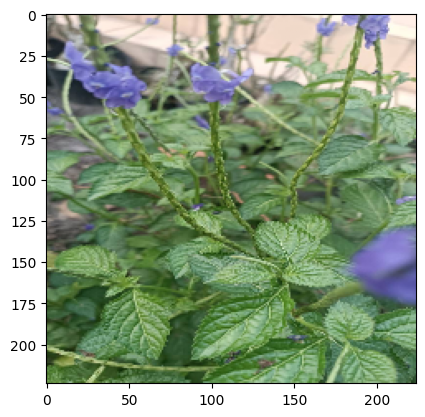

In [36]:
# Using a for loop to find the name in 'one' and print the corresponding element from 'two'
img=cv2.imread("C:/Users/Piriyavinojan/Desktop/project/image/2.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
img=img/255.
import matplotlib.pyplot as plt
plt.imshow(img)
img=img.reshape(1,224,224,3)
import numpy as np
res=model.predict(img)
print(res)
search_name = out[np.argmax(res)]
print(search_name)

for i in range(len(out)):
    if out[i] == search_name:
        plant_name = out[i]
        uses = plant_uses_tamil[i]
        #print(f"{out[i]}")
        print(f"பயன்கள் :-")
        print(f"{plant_uses_tamil[i]}")

In [37]:
model.save('my_model.keras')

In [38]:
import tensorflow as tf

# Load the Keras model
keras_model = tf.keras.models.load_model('my_model.keras')


In [39]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()


INFO:tensorflow:Assets written to: C:\Users\PIRIYA~1\AppData\Local\Temp\tmpxo_40qru\assets


INFO:tensorflow:Assets written to: C:\Users\PIRIYA~1\AppData\Local\Temp\tmpxo_40qru\assets


Saved artifact at 'C:\Users\PIRIYA~1\AppData\Local\Temp\tmpxo_40qru'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2504109352208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2504109351632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2504109349904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2504109351824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2504109352784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2504109348944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2504109351056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2504109350480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2504109350864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2504109349712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  25

In [41]:
# Save the TensorFlow Lite model as a .tflite file
with open('my_model.tflite', 'wb') as f:
    f.write(tflite_model)
